<a href="https://colab.research.google.com/github/88kHw88/Winc.Assignment.Income-inequality-in-relation-to-GDP/blob/main/Income_inequality_in_relation_to_GDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy.polynomial.polynomial as poly
from scipy.stats import pearsonr
%load_ext google.colab.data_table


**How to deal?**

We want to combine two datasets, GDP and Gini, into one dataset

However we somehow need to deal with non-existing data that prevents us from calculating the relation. For example: Afghanistan exists in the GDP dataset, but not in the Gini dataset.

Therefore we need to create a new column in both dataset. We select columns which exists in both datasets. Then we merge two datasets together with a unique value. For example: column 'Entity' and column 'Year' exists in both GDP and Gini dataset.

By using pd.merge we merge the GDP and Gini dataset together by using our new unique value 'Entity_Year'. This automatically drops rows which the pd.merge can't find. Now we can calculate the correlation with the remaining data available.


In [2]:
#import data GDP
df_gdp = pd.read_csv("https://raw.githubusercontent.com/88kHw88/Winc.Assignment.Income-inequality-in-relation-to-GDP/main/gdp-per-capita-maddison-2020.csv")

#rename columns
df_gdp = df_gdp.rename(columns={'GDP per capita':'GDP'})

#make a new column with Entity and Year
#column 'Year' has 'int' values, so we need to convert it to str values
#https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-pandas-dataframe 
df_gdp['Entity_Year'] = df_gdp['Entity'] + "_" + df_gdp['Year'].astype(str)
df_gdp

Entity Code  Year      GDP 145446-annotations       Entity_Year
0      Afghanistan  AFG  1950  1156.00                NaN  Afghanistan_1950
1      Afghanistan  AFG  1951  1170.00                NaN  Afghanistan_1951
2      Afghanistan  AFG  1952  1189.00                NaN  Afghanistan_1952
3      Afghanistan  AFG  1953  1240.00                NaN  Afghanistan_1953
4      Afghanistan  AFG  1954  1245.00                NaN  Afghanistan_1954
...            ...  ...   ...      ...                ...               ...
19873     Zimbabwe  ZWE  2014  1594.00                NaN     Zimbabwe_2014
19874     Zimbabwe  ZWE  2015  1560.00                NaN     Zimbabwe_2015
19875     Zimbabwe  ZWE  2016  1534.00                NaN     Zimbabwe_2016
19876     Zimbabwe  ZWE  2017  1582.37                NaN     Zimbabwe_2017
19877     Zimbabwe  ZWE  2018  1611.41                NaN     Zimbabwe_2018

[19878 rows x 6 columns]

In [3]:
#import data Gini 
df_gini = pd.read_csv("https://raw.githubusercontent.com/88kHw88/Winc.Assignment.Income-inequality-in-relation-to-GDP/main/economic-inequality-gini-index.csv")

#rename columns
df_gini = df_gini.rename(columns={'Gini index':'Gini'})
df_gini

#make a new column with Entity and Year
#column 'Year' has 'int' values, so we need to convert it to str values
df_gini['Entity_Year'] = df_gini['Entity'] + "_" + df_gini['Year'].astype(str)
df_gini

Entity Code  Year      Gini    Entity_Year
0      Albania  ALB  1981  27.01034   Albania_1981
1      Albania  ALB  1982  27.01034   Albania_1982
2      Albania  ALB  1983  27.01034   Albania_1983
3      Albania  ALB  1984  27.01034   Albania_1984
4      Albania  ALB  1985  27.01034   Albania_1985
...        ...  ...   ...       ...            ...
4379  Zimbabwe  ZWE  2009  43.15358  Zimbabwe_2009
4380  Zimbabwe  ZWE  2010  43.15358  Zimbabwe_2010
4381  Zimbabwe  ZWE  2011  43.15358  Zimbabwe_2011
4382  Zimbabwe  ZWE  2017  44.33708  Zimbabwe_2017
4383  Zimbabwe  ZWE  2019  50.25645  Zimbabwe_2019

[4384 rows x 5 columns]

In [4]:
#merging two datasets into one dataset, on='Entity_Year'
df = pd.merge(df_gdp, df_gini, on='Entity_Year')
df


Entity_x Code_x  Year_x      GDP  ...  Entity_y Code_y Year_y      Gini
0      Albania    ALB    1981  3762.00  ...   Albania    ALB   1981  27.01034
1      Albania    ALB    1982  3783.00  ...   Albania    ALB   1982  27.01034
2      Albania    ALB    1983  3805.00  ...   Albania    ALB   1983  27.01034
3      Albania    ALB    1984  3826.00  ...   Albania    ALB   1984  27.01034
4      Albania    ALB    1985  3846.00  ...   Albania    ALB   1985  27.01034
...        ...    ...     ...      ...  ...       ...    ...    ...       ...
3567  Zimbabwe    ZWE    2008  1197.53  ...  Zimbabwe    ZWE   2008  43.15358
3568  Zimbabwe    ZWE    2009  1285.05  ...  Zimbabwe    ZWE   2009  43.15358
3569  Zimbabwe    ZWE    2010  1401.86  ...  Zimbabwe    ZWE   2010  43.15358
3570  Zimbabwe    ZWE    2011  1515.00  ...  Zimbabwe    ZWE   2011  43.15358
3571  Zimbabwe    ZWE    2017  1582.37  ...  Zimbabwe    ZWE   2017  44.33708

[3572 rows x 10 columns]

In [5]:
#make a new dataset with relevant columns
df_gdp_gini = df[['Entity_Year', 'GDP', 'Gini']]
df_gdp_gini

Entity_Year      GDP      Gini
0      Albania_1981  3762.00  27.01034
1      Albania_1982  3783.00  27.01034
2      Albania_1983  3805.00  27.01034
3      Albania_1984  3826.00  27.01034
4      Albania_1985  3846.00  27.01034
...             ...      ...       ...
3567  Zimbabwe_2008  1197.53  43.15358
3568  Zimbabwe_2009  1285.05  43.15358
3569  Zimbabwe_2010  1401.86  43.15358
3570  Zimbabwe_2011  1515.00  43.15358
3571  Zimbabwe_2017  1582.37  44.33708

[3572 rows x 3 columns]

In [6]:
#determine correlation between GDP and Gini 
#by using Pearson correlation 
df_gdp_gini.corr(method='pearson')


#There seems a negative relation of -0.4109 between GDP coefficient and Income inequality.
#It falls in the 0.4 and <0.6 category which means the relation is relatively strong.  
#This means the higher the GDP the less income inequality exist. 


GDP      Gini
GDP   1.000000 -0.410894
Gini -0.410894  1.000000

In [7]:
#different way to calculate correlation
#https://www.geeksforgeeks.org/python-pearson-correlation-test-between-two-variables/
gdp = df_gdp_gini['GDP']
gini = df_gdp_gini['Gini']

corr, _ = pearsonr(gdp, gini)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.411


<Figure size 432x288 with 0 Axes>

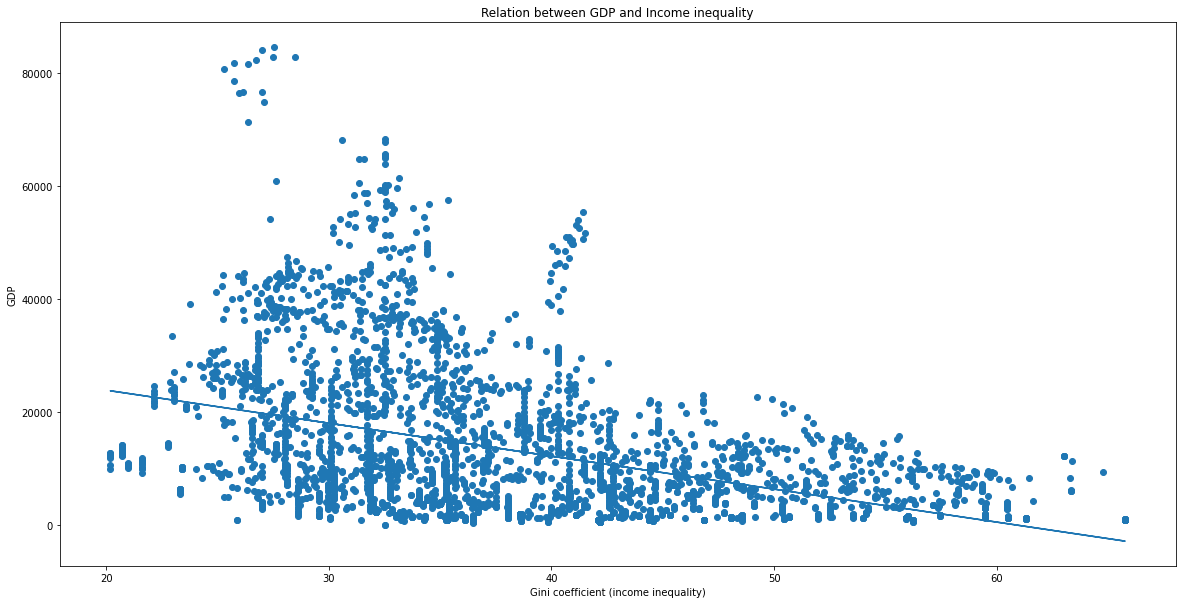

In [8]:
#Extra: Visualisation of the result
#plotting a scatterplot
fig = plt.figure()
fig, ax = plt.subplots()

y = df_gdp_gini['GDP']
x = df_gdp_gini['Gini']


plt.scatter(x, y)
plt.ylabel('GDP')
plt.xlabel('Gini coefficient (income inequality)')
plt.title('Relation between GDP and Income inequality')
fig.set_size_inches(20,10)

#apply linear regression 
coefs = poly.polyfit(x, y, 1)
ffit = poly.polyval(x, coefs)
plt.plot(x, ffit)

"""
linear regressions shows an negative trend downwards, which implies there is 
a negative relation between GDP and the GINI coefficient
"""
plt.show()